# Project 1: Analysis and Forecasting of NYC Taxi Rides
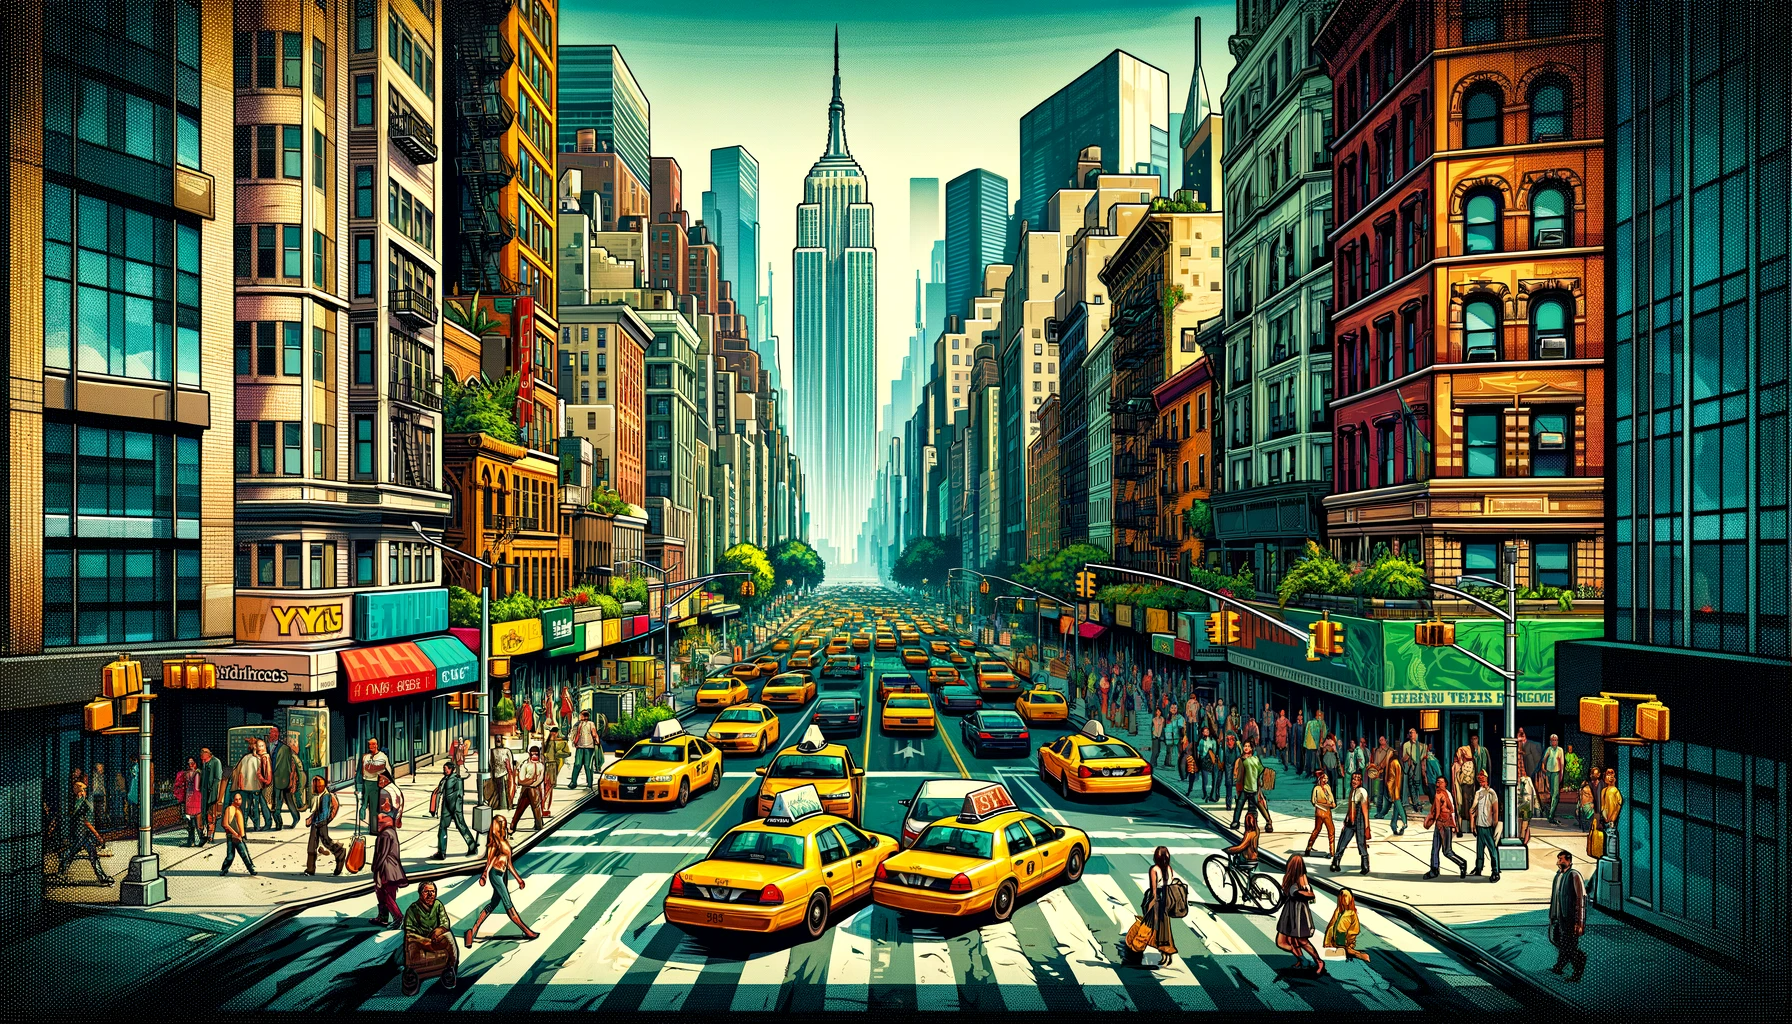

In [47]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [48]:
import pandas as pd
from src.utils import *

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2024'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow_raw = pd.concat(df_yellow_list)
df_green_raw = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [49]:
df_yellow_raw.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80         1.0                  N           140           236   
2           4.70         1.0                  N           236            79   
3           1.40         1.0                  N            79           211   
4           0.80         1.0                  N           211           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         17.7    1.0      0.5        0.00           0.0   
1             1         10.0    3.5      0.5        3.75           0.0   
2             1         23.3    3.5      0.5        3.00           0.0   
3             1         10.0    3.5      0.5        2.00           0.0   
4             1          7.9    3.5      0.5        3.20           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         22.70                   2.5          0.0  
1                    1.0         18.75                   2.5          0.0  
2                    1.0         31.30                   2.5          0.0  
3                    1.0         17.00                   2.5          0.0  
4                    1.0         16.10                   2.5          0.0

In [50]:
df_green_raw.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2024-01-01 00:46:55   2024-01-01 00:58:25                  N   
1         2  2024-01-01 00:31:42   2024-01-01 00:52:34                  N   
2         2  2024-01-01 00:30:21   2024-01-01 00:49:23                  N   
3         1  2024-01-01 00:30:20   2024-01-01 00:42:12                  N   
4         2  2024-01-01 00:32:38   2024-01-01 00:43:37                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           236           239              1.0           1.98   
1         1.0            65           170              5.0           6.54   
2         1.0            74           262              1.0           3.08   
3         1.0            74           116              1.0           2.40   
4         1.0            74           243              1.0           5.14   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0         12.8    1.0      0.5        3.61           0.0        NaN   
1         30.3    1.0      0.5        7.11           0.0        NaN   
2         19.8    1.0      0.5        3.00           0.0        NaN   
3         14.2    1.0      1.5        0.00           0.0        NaN   
4         22.6    1.0      0.5        6.28           0.0        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    1.0         21.66           1.0        1.0   
1                    1.0         42.66           1.0        1.0   
2                    1.0         28.05           1.0        1.0   
3                    1.0         16.70           2.0        1.0   
4                    1.0         31.38           1.0        1.0   

   congestion_surcharge  
0                  2.75  
1                  2.75  
2                  2.75  
3                  0.00  
4                  0.00

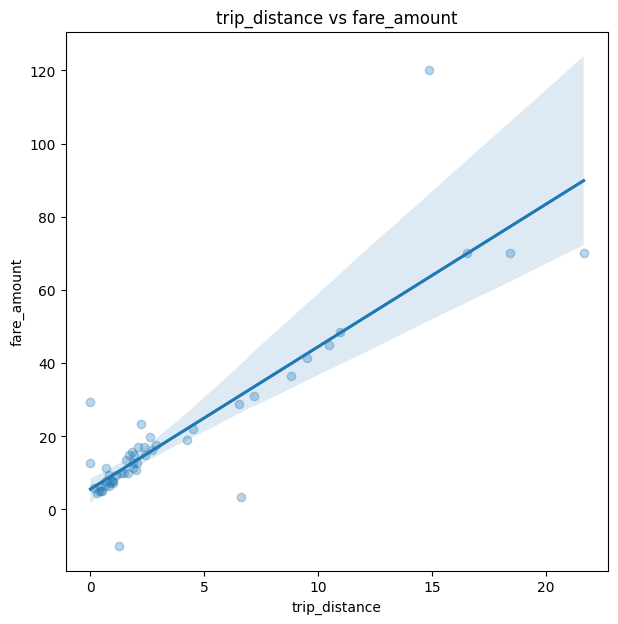

In [51]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow_raw.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

Pay attention to the trip distance (and maybe also fare amount). Are there outliers? Should some data (that looks apparently not practical) be dropped?

Cleaned # rows 6024
Cleaned # rows 201029


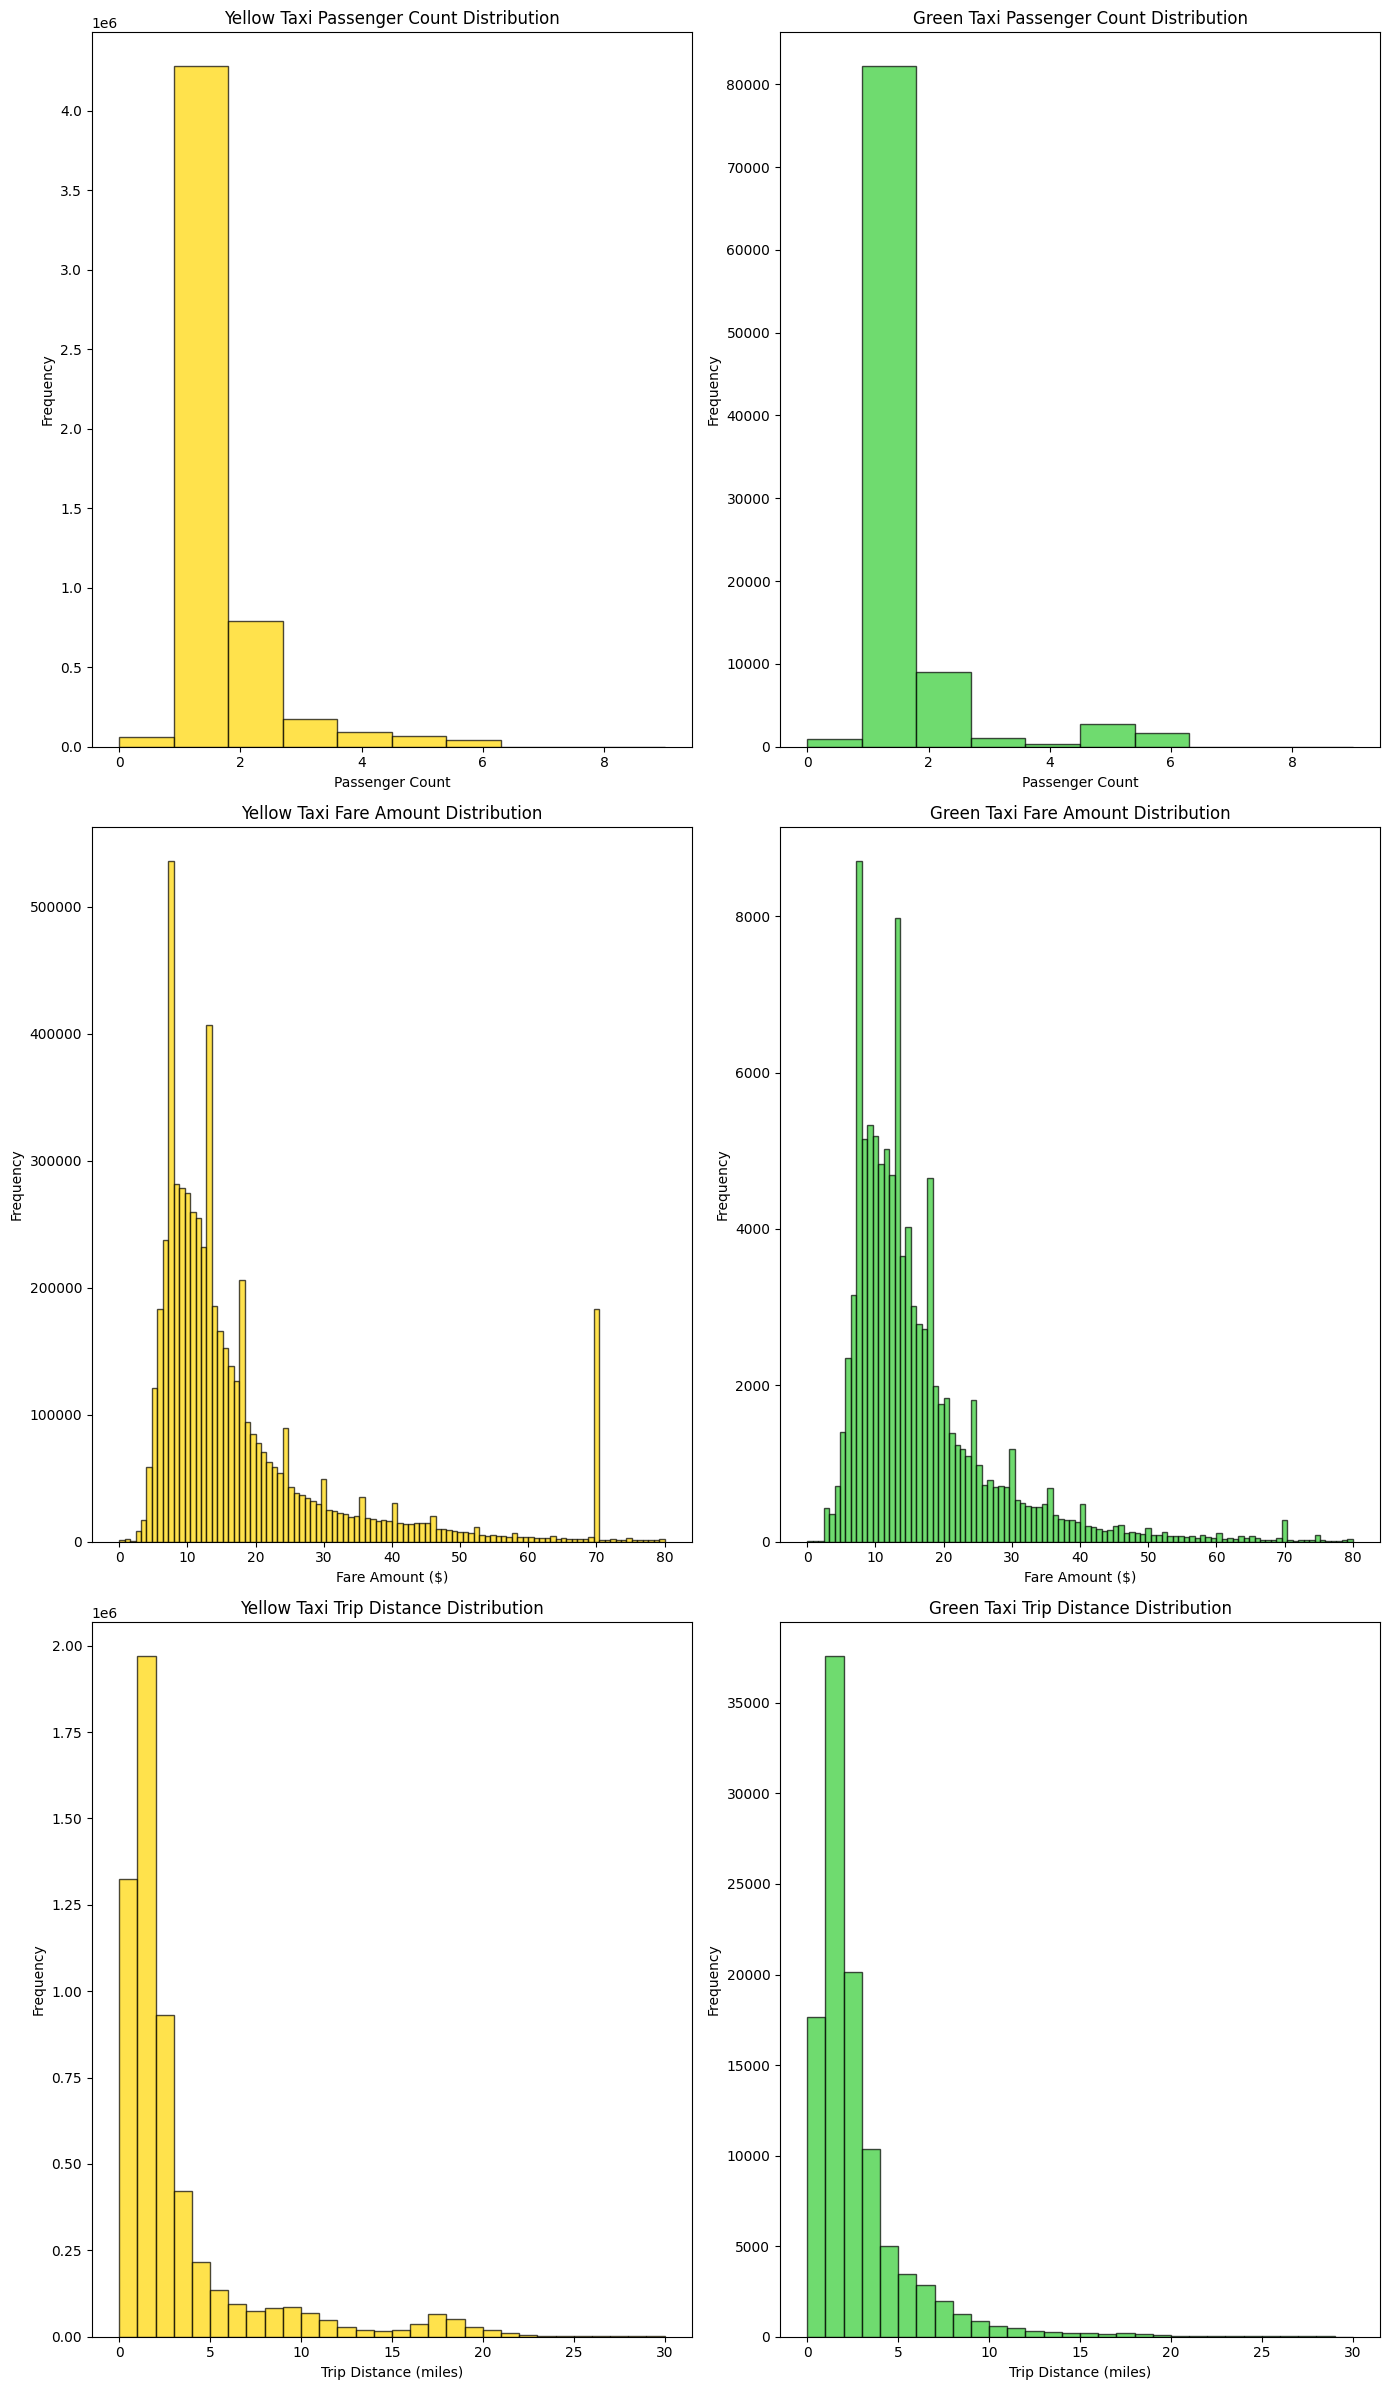

In [52]:
# Write your code and markdowns

# Showing the optional parameters for transparency.
# This should remove any cancelled or refunded rides. So that our data becomes more cleaner.
df_green = remove_outliers(df_green_raw, min_trip_distance=0, max_trip_distance=1000, min_fare=0, max_fare=1000)
df_yellow = remove_outliers(df_yellow_raw, min_trip_distance=0, max_trip_distance=1000, min_fare=0, max_fare=1000)

print("Cleaned # rows", len(df_green_raw) - len(df_green))
print("Cleaned # rows", len(df_yellow_raw) - len(df_yellow))


fig, ((passenger_count_yellow, passenger_count_green),
      (fare_amount_yellow, fare_amount_green),
      (trip_distance_yellow_hist, trip_distance_green_hist)) = plt.subplots(3, 2, figsize=(14, 24))

# Passenger count
# Histograms with lighter colors
passenger_count_yellow.hist(df_yellow['passenger_count'], bins=10, color='gold', edgecolor='black', alpha=0.7)
passenger_count_yellow.set_title('Yellow Taxi Passenger Count Distribution')
passenger_count_yellow.set_xlabel('Passenger Count')
passenger_count_yellow.set_ylabel('Frequency')

passenger_count_green.hist(df_green['passenger_count'], bins=10, color='limegreen', edgecolor='black', alpha=0.7)
passenger_count_green.set_title('Green Taxi Passenger Count Distribution')
passenger_count_green.set_xlabel('Passenger Count')
passenger_count_green.set_ylabel('Frequency')


# Histograms for fare amounts with lighter colors
fare_amount_yellow.hist(df_yellow['fare_amount'], bins=100, range=(0, 80), color='gold', edgecolor='black', alpha=0.7)
fare_amount_yellow.set_title('Yellow Taxi Fare Amount Distribution')
fare_amount_yellow.set_xlabel('Fare Amount ($)')
fare_amount_yellow.set_ylabel('Frequency')

fare_amount_green.hist(df_green['fare_amount'], bins=100, range=(0, 80), color='limegreen', edgecolor='black', alpha=0.7)
fare_amount_green.set_title('Green Taxi Fare Amount Distribution')
fare_amount_green.set_xlabel('Fare Amount ($)')
fare_amount_green.set_ylabel('Frequency')

# Histograms for trip distances with lighter colors
trip_distance_yellow_hist.hist(df_yellow['trip_distance'], bins=30, range=(0, 30), color='gold', edgecolor='black', alpha=0.7)
trip_distance_yellow_hist.set_title('Yellow Taxi Trip Distance Distribution')
trip_distance_yellow_hist.set_xlabel('Trip Distance (miles)')
trip_distance_yellow_hist.set_ylabel('Frequency')

trip_distance_green_hist.hist(df_green['trip_distance'], bins=30, range=(0, 30), color='limegreen', edgecolor='black', alpha=0.7)
trip_distance_green_hist.set_title('Green Taxi Trip Distance Distribution')
trip_distance_green_hist.set_xlabel('Trip Distance (miles)')
trip_distance_green_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Before plotting all the data, the data was cleaned and, free trips were removed(cancelled or refunded fares) and same with zero distance trips.
Based from the data, it's very easy to see, that most trips cost around 10 bucks, and are below 3 miles in distance. Most taxi trips are with only a single passenger.

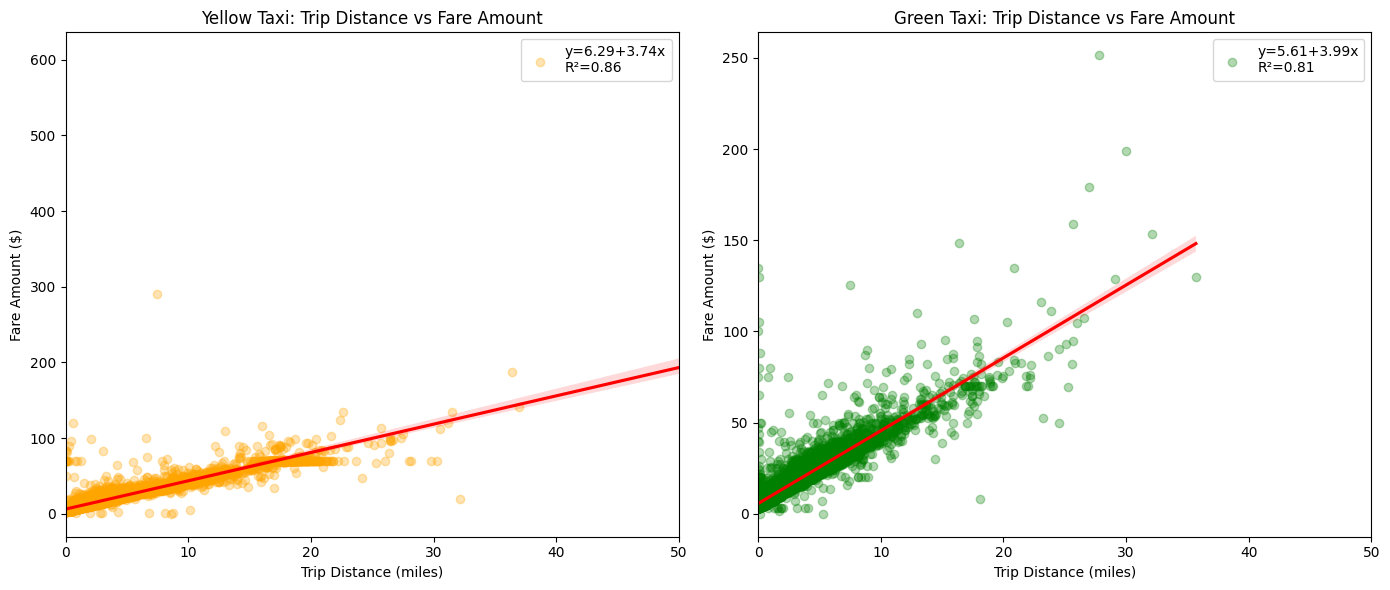

In [10]:
import matplotlib.cm as cm
from scipy.stats import linregress
from src.utils import plot_scatter_with_trendline

# Normalization for color scale
norm = plt.Normalize(0, 500)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Yellow Taxi scatter plot with trendline
sample_df_yellow = df_yellow.sample(10000)
yellow_slope, yellow_intercept, yellow_r, yellow_p, yellow_err = plot_scatter_with_trendline(
    axs[0], sample_df_yellow['trip_distance'], sample_df_yellow['fare_amount'], 
    'Yellow Taxi: Trip Distance vs Fare Amount', 'Trip Distance (miles)', 'Fare Amount ($)', 
    'orange', xlim=(0, 50)
)

# Green Taxi scatter plot with trendline
sample_df_green = df_green.sample(10000)

green_slope, green_intercept, green_r, green_p, green_err = plot_scatter_with_trendline(
    axs[1], sample_df_green['trip_distance'], sample_df_green['fare_amount'], 
    'Green Taxi: Trip Distance vs Fare Amount', 'Trip Distance (miles)', 'Fare Amount ($)', 
    'green', xlim=(0, 50)
)

axs[0].set_xlim(0, 50)
axs[1].set_xlim(0, 50)

plt.tight_layout()
plt.show()

**Textbook Practice**:
Apply the principle of "choosing an effective visual" in Chapter 2 to make the visualization. Explain how this principle is applied.

Scatter plots are a powerful tool for visualizing the relationship between two continuous variables. They allow us to plot individual data points, enabling us to identify patterns, clusters, and outliers easily. By adding a trendline to the scatter plot, we can summarize the overall trend in the data, providing a clear visual representation of the correlation between trip distance and fare amount.

To further enhance the effectiveness of our scatter plot, we utilize color as a preattentive attribute. By applying a colormap to the data points, we can encode additional information, such as fare amount, which aids in quickly distinguishing between high and low fares. This approach aligns with the principle of utilizing visual attributes to draw attention to crucial data points and trends.

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

**Important** Try **NOT** to load too many data to kepler, as it cannot handle many data at one time. Try visualize the pattern for just 1-2 hours first.

In [42]:
# Removing duplicates by keeping the first occurrence
from src.utils import *
from keplergl import KeplerGl


df_yellow_taxi = kepler_repair_data(df_yellow.sample(100000), df_zones)
df_green_taxi = kepler_repair_data(df_green.sample(100000), df_zones)

# Make empty map
map = KeplerGl(height=600)

# Add data to the map
map.add_data(data=df_yellow_taxi, name='yellow_taxi')
map.add_data(data=df_green_taxi, name='green_taxi')

map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


KeplerGl(data={'yellow_taxi': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

**Textbook Practice**: Apply the principle "focus your audience's attention" in Chapter 4. Explain briefly how you expect your visualization captures your audience's attention.

This is done through the incorporation of different markers and other forms of interactivity which assist in directing attention to hotspots or zones where a lot of taxis are likely to be found. This approach aims not only at highlighting the essential spatial patterns, but also at allowing users to perform exploratory analyses on the data.


### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

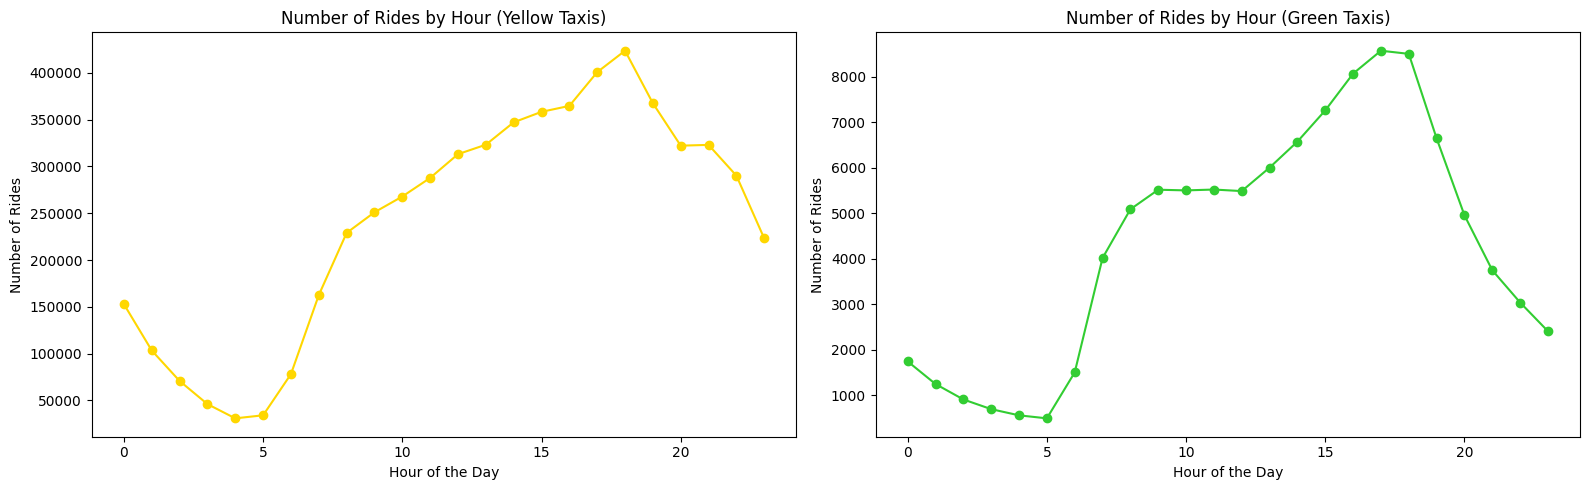

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime


# Calculate the count of rides by hour for yellow taxis and sort by hour
ride_count_by_hour_yellow = df_yellow.groupby("hours").size().sort_index()

# Calculate the count of rides by hour for green taxis and sort by hour
ride_count_by_hour_green = df_green.groupby("hours").size().sort_index()

# Set the x-axis values for the bar chart
hours = range(24)

# Set the width of each bar
bar_width = 0.35
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot the line for yellow taxis
ax1.plot(hours, ride_count_by_hour_yellow, marker='o', color='gold')

# Set the x-axis and y-axis labels for yellow taxis
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Rides')

# Set the plot title for yellow taxis
ax1.set_title('Number of Rides by Hour (Yellow Taxis)')

# Plot the line for green taxis
ax2.plot(hours, ride_count_by_hour_green, marker='o', color='limegreen')
# Set the x-axis and y-axis labels for green taxis
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Number of Rides')
ax2.set_title('Number of Rides by Hour (Green Taxis)')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

/var/folders/yb/fl_qklrn7dl9p_30_s3n8tkc0000gn/T/ipykernel_1185/913696296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow["tpep_pickup_datetime"] = pd.to_datetime(df_yellow["tpep_pickup_datetime"])
/var/folders/yb/fl_qklrn7dl9p_30_s3n8tkc0000gn/T/ipykernel_1185/913696296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow["hours"] = df_yellow["tpep_pickup_datetime"].dt.hour
/var/folders/yb/fl_qklrn7dl9p_30_s3n8tkc0000gn/T/ipykernel_1185/913696296.py:7: SettingWithCopyWarning: 
A valu

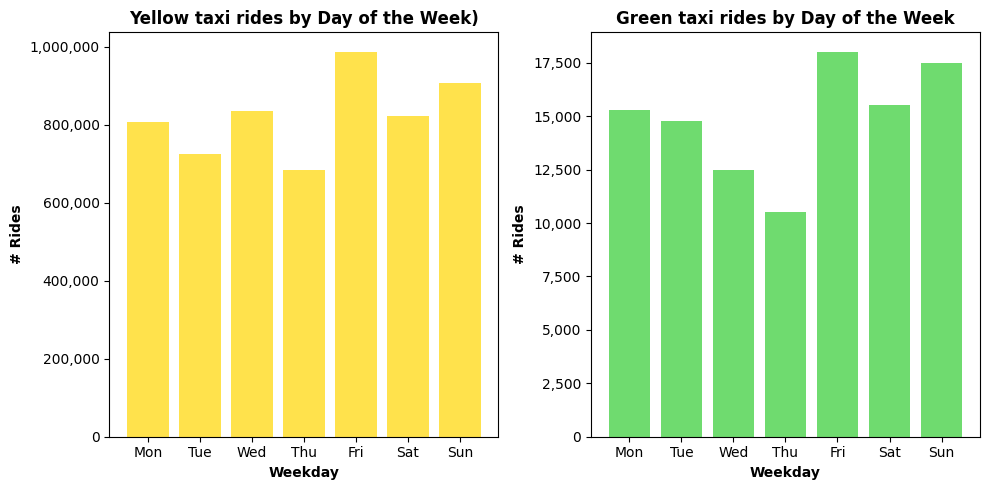

In [30]:
import matplotlib.ticker as ticker

weekday_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Convert the date columns to datetime objects
df_yellow["tpep_pickup_datetime"] = pd.to_datetime(df_yellow["tpep_pickup_datetime"])
df_yellow["hours"] = df_yellow["tpep_pickup_datetime"].dt.hour
df_yellow["day_of_week"] = df_yellow["tpep_pickup_datetime"].dt.dayofweek
df_yellow["month"] = df_yellow["tpep_pickup_datetime"].dt.month
df_yellow["day_of_week"] = df_yellow["day_of_week"].map(lambda x: weekday_names[x])

# Map the day of the week to weekday names
df_green["lpep_pickup_datetime"] = pd.to_datetime(df_green["lpep_pickup_datetime"])
df_green["hours"] = df_green["lpep_pickup_datetime"].dt.hour
df_green["day_of_week"] = df_green["lpep_pickup_datetime"].dt.dayofweek
df_green["month"] = df_green["lpep_pickup_datetime"].dt.month
df_green["day_of_week"] = df_green["day_of_week"].map(lambda x: weekday_names[x])


# Calculate the count of rides by day of the week for yellow taxis
ride_count_by_day_yellow = df_yellow["day_of_week"].value_counts().sort_index()

# Calculate the count of rides by day of the week for green taxis
ride_count_by_day_green = df_green["day_of_week"].value_counts().sort_index()

# Define the weekday names
weekday_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


# Plot for yellow taxis
ax1.bar(weekday_names, ride_count_by_day_yellow, color='gold', alpha=0.7)
ax1.set_xlabel('Weekday', fontsize=10, fontweight='bold')
ax1.set_ylabel('# Rides', fontsize=10, fontweight='bold')
ax1.set_title('Yellow taxi rides by Day of the Week)', fontweight='bold')
#ax1.tick_params(axis='x', rotation=45, labelsize=9.5)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels

# Plot for green taxis
ax2.bar(weekday_names, ride_count_by_day_green, color='limegreen', alpha=0.7)
ax2.set_xlabel('Weekday', fontsize=10, fontweight='bold')
ax2.set_ylabel('# Rides', fontsize=10, fontweight='bold')
ax2.set_title("Green taxi rides by Day of the Week", fontweight='bold')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels

plt.tight_layout()

plt.show()

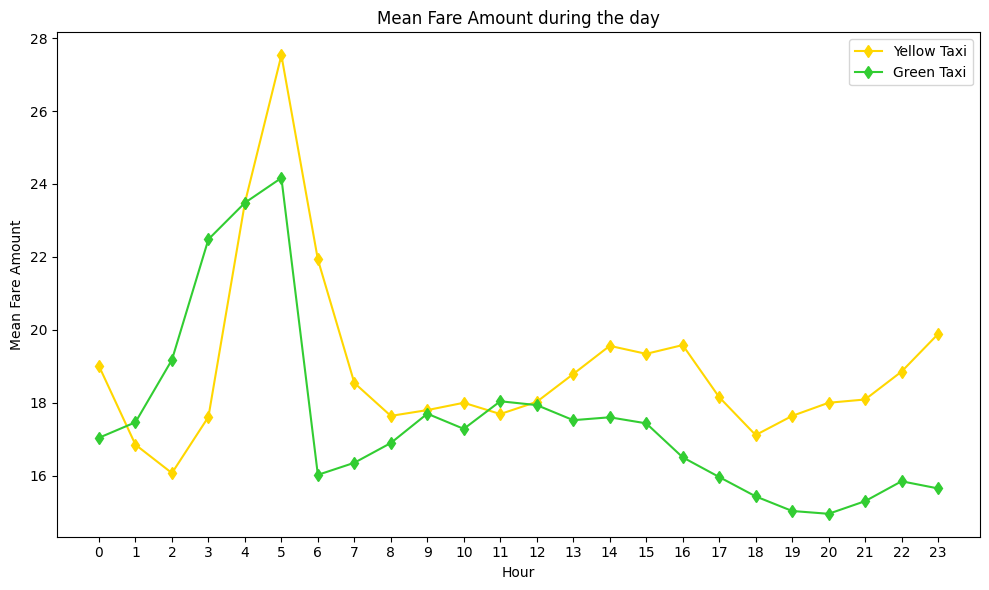

In [45]:
# Extract hour component
df_yellow['Hour'] = pd.to_datetime(df_yellow['tpep_pickup_datetime']).dt.hour
df_green['Hour'] = pd.to_datetime(df_green['lpep_pickup_datetime']).dt.hour

# Calculate average fare per hour for both datasets
average_fare_by_hour_yellow = df_yellow.groupby('Hour')['fare_amount'].mean()
average_fare_by_hour_green = df_green.groupby('Hour')['fare_amount'].mean()

plt.figure(figsize=(10, 6))

# Plot line for Yellow Taxi
plt.plot(average_fare_by_hour_yellow.index, average_fare_by_hour_yellow,
        marker='d', label='Yellow Taxi', color='gold')

# Plot line for Green Taxi
plt.plot(average_fare_by_hour_green.index, average_fare_by_hour_green,
        marker='d', label='Green Taxi', color='limegreen')

plt.xlabel('Hour')
plt.ylabel('Mean Fare Amount')

plt.title('Mean Fare Amount during the day')

# Remove grid
plt.grid(False)

plt.legend(loc='upper right')

# Set x-ticks to show all hours
plt.xticks(range(24))
plt.tight_layout()

plt.show()

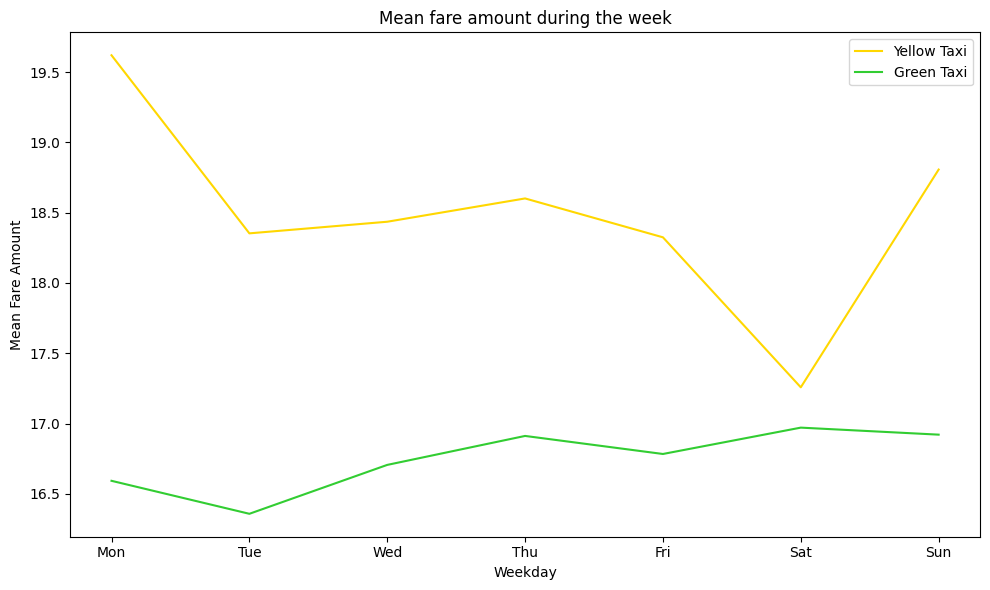

In [46]:

# Calculate average fare per hour for both datasets
average_fare_by_day_of_week_yellow = df_yellow.groupby('day_of_week')['fare_amount'].mean()
average_fare_by_day_of_week_green = df_green.groupby('day_of_week')['fare_amount'].mean()

# Configure and plot the figure
plt.figure(figsize=(10, 6))


#Sort the x-axis
average_fare_by_day_of_week_yellow = average_fare_by_day_of_week_yellow.reindex(weekday_names)
average_fare_by_day_of_week_green = average_fare_by_day_of_week_green.reindex(weekday_names)


# Plot line for Yellow Taxi
plt.plot(average_fare_by_day_of_week_yellow.index, average_fare_by_day_of_week_yellow, label='Yellow Taxi', color='gold')

# Plot line for Green Taxi
plt.plot(average_fare_by_day_of_week_green.index, average_fare_by_day_of_week_green, label='Green Taxi', color='limegreen')

# Set x-axis and y-axis labels
plt.xlabel('Weekday')
plt.ylabel('Mean Fare Amount')

# Set the title
plt.title('Mean fare amount during the week')
plt.grid(False)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

**Textbook Practice**: Use the principle "clutter is your enemy" to simplify your plots/graphs properly. Explain your motivation for each plot.

To show the average fare amounts of Yellow and Green Taxis in weekdays, simple line graph that are easily noticable from each other has been used, with Yellow Taxi represented in gold colour while Green Taxi in lime green. Thus, the plot is neater, non-essential elements such as gridlines are excluded, while its simplification does not affect understanding.

The labels on the x-axis have been arranged in order to correspond to the days of the week, which makes the chart even more comprehensible. All legends are plotted deliberately at the upper right corner to facilitate the identification of each dataset. This simple way allows for understanding the differences in average fare quantity proved on both kinds of taxi services during weekdays and without superfluous graphic elements interfering with the perception of patterns.


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Modeling Details**:
Conduct parameter tuning for the forecasting model. Use cross-validation techniques appropriate for time series data, like time-based splitting.

**Evaluation Metrics**:
Specify which metrics will be used to evaluate the forecasting model, such as MAE (Mean Absolute Error), RMSE (Root Mean Square Error), or MAPE (Mean Absolute Percentage Error). Explain why these metrics are suitable (or not suitable) for the task.

**Visualization and Textbook Practice**: Plotting the forecasts against actual values to visually assess the model's performance. Creating a plot that shows how the forecast and confidence intervals change over time. You need to explain how the principles below are used for making this plot:
- "Choose an appropriate display" (Chapter 2)
- "Eliminate clutter" (Chapter 3)
- "Draw attention shere you want it" (Chapter 4)
- "Think like a designer" (Chapter 5)

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

20:27:31 - cmdstanpy - INFO - Chain [1] start processing
20:27:31 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


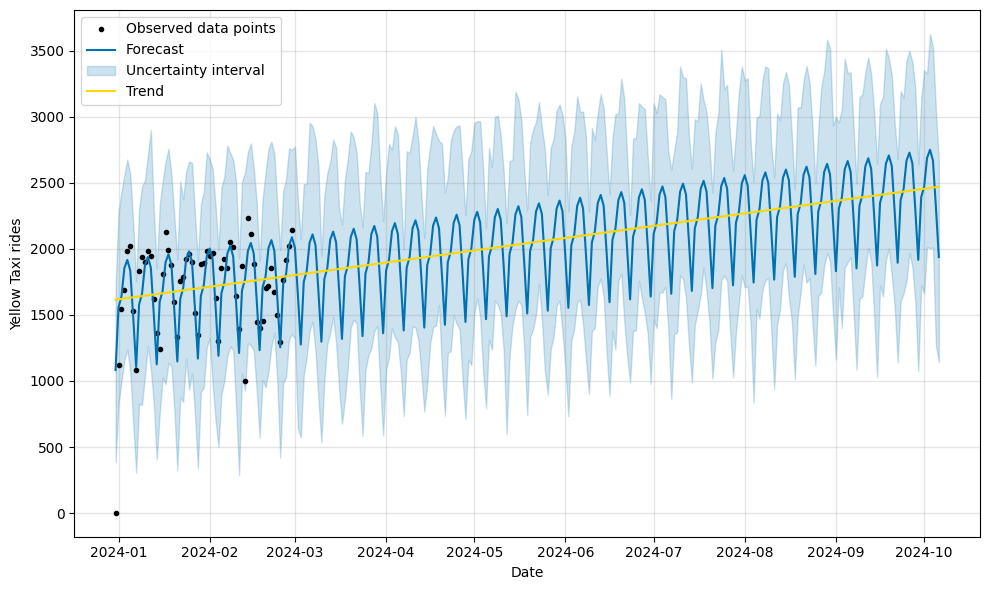

In [60]:
# Write your code and markdowns
import pandas as pd
from prophet import Prophet

df_prepared_yellow = df_green.copy()

# Prepare the df
df_prepared_yellow['lpep_pickup_datetime'] = pd.to_datetime(df_prepared_yellow['lpep_pickup_datetime']).dt.date
df_prepared_yellow = df_prepared_yellow.groupby('lpep_pickup_datetime').size().reset_index(name='trips_numbers')
df_prepared_yellow = df_prepared_yellow.rename(columns={'lpep_pickup_datetime': 'ds', 'trips_numbers': 'y'})

yellow_model = Prophet(interval_width = 1)
yellow_model.fit(df_prepared_yellow)

forecast_yellow = yellow_model.predict(yellow_model.make_future_dataframe(periods=220,include_history=True))
forecast_yellow[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

yellow_model.plot(forecast_yellow, xlabel='Date', ylabel='Yellow Taxi rides')
plt.plot(forecast_yellow['ds'], forecast_yellow['trend'], color='gold', label='Trend')

plt.legend()
plt.show()

20:27:29 - cmdstanpy - INFO - Chain [1] start processing
20:27:29 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


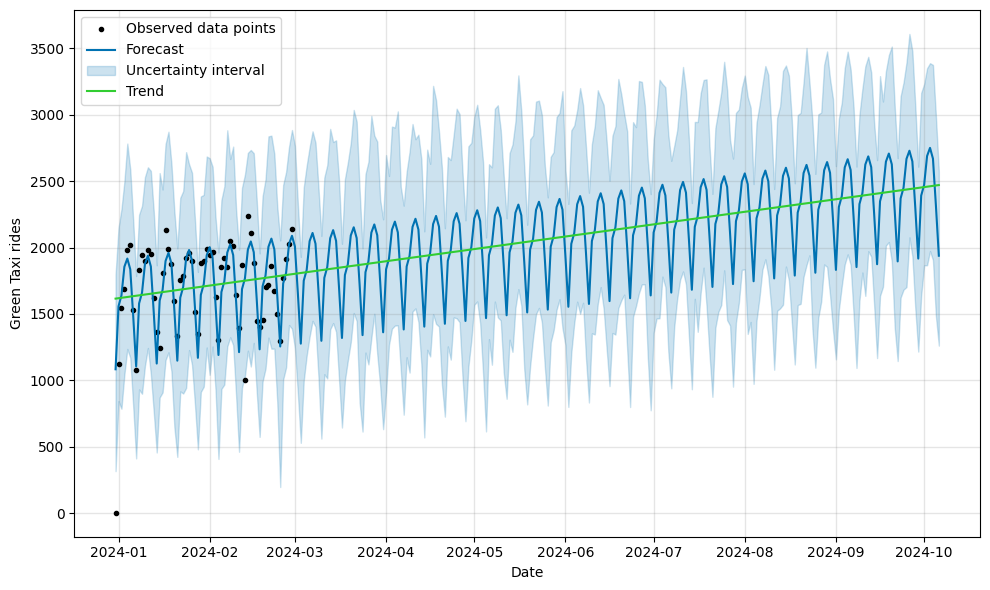

In [59]:
# Write your code and markdowns
import pandas as pd
from prophet import Prophet

df_prepared_green = df_green.copy()

# Prepare the df
df_prepared_green['lpep_pickup_datetime'] = pd.to_datetime(df_prepared_green['lpep_pickup_datetime']).dt.date
df_prepared_green = df_prepared_green.groupby('lpep_pickup_datetime').size().reset_index(name='trips_numbers')
df_prepared_green = df_prepared_green.rename(columns={'lpep_pickup_datetime': 'ds', 'trips_numbers': 'y'})

green_model = Prophet(interval_width = 1)
green_model.fit(df_prepared_green)

forecast_green = green_model.predict(green_model.make_future_dataframe(periods=220, include_history=True))
forecast_green[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

green_model.plot(forecast_green, xlabel='Date', ylabel='Green Taxi rides')
plt.plot(forecast_green['ds'], forecast_green['trend'], color='limegreen', label='Trend')

plt.legend()
plt.show()


#### Evaluvating the models

In [62]:
# Model evaluation
from sklearn.metrics import mean_squared_error

predictions_green = forecast_green[-len(df_prepared_green):]['yhat']
mse_green = mean_squared_error(df_prepared_green['y'], predictions_green)
rmse_green = np.sqrt(mse_green)

predictions_yellow = forecast_yellow[-len(df_prepared_yellow):]['yhat']
mse_yellow = mean_squared_error(df_prepared_yellow['y'], predictions_yellow)
rmse_yellow = np.sqrt(mse_yellow)

print("Yellow Taxi Ride Forecast Evaluation:")
print("RMSE: {:.2f}".format(rmse_yellow))

print("Green Taxi Ride Forecast Evaluation:")
print("RMSE: {:.2f}".format(rmse_green))

Yellow Taxi Ride Forecast Evaluation:
RMSE: 866.08
Green Taxi Ride Forecast Evaluation:
RMSE: 866.08


In creating this visualization for this report, we aimed for the following principles on data visualization: 
First, we selected an appropriate display by employing a line plot to present the actual and forecasted green taxi ride data over time. This choice enabled us to demonstrate trends and fluctuations in the data without compromising clarity.
Second, we eliminated clutter by selectively including essential elements: outcomes, predicted values, margins of error, and the line of best fit. This approach makes it relatively easy for the viewers to assimilate the main points without unnecessary interference.

Third, we deliberately focused on areas that require it using contrasting color and different lines for the forecasted trend and the interval of confidence. Finally, we employed design principles, similar to the design approach; the layout of the plot is appropriately organized and labeled making it easier for the audience to understand while at the same time being aesthetically appealing.

Altogether, the principles outlined above were used to build a visually appealing and meaningful narrative to present our findings on the green/yellow taxi ride forecasts.